In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

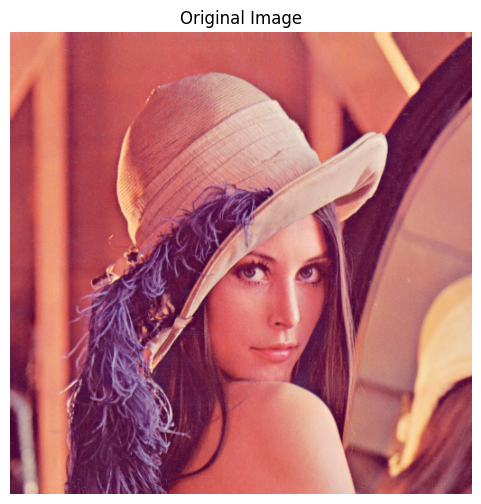

In [6]:
image = cv2.imread('lena.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


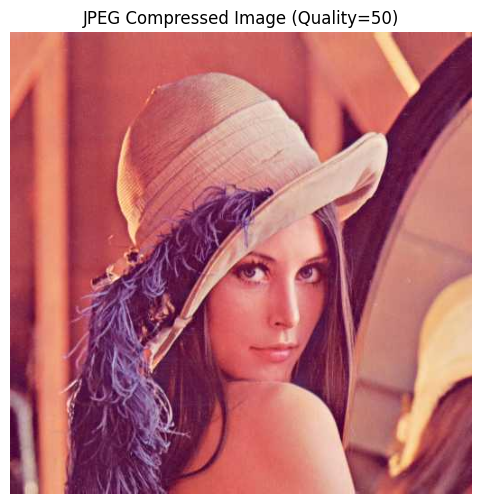

Original Image Size: 462.73 KB
Compressed Image Size: 23.76 KB
Compression Ratio: 5.13%


In [7]:

jpeg_quality = 50
cv2.imwrite('compressed_image.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality])

compressed_image = cv2.imread('compressed_image.jpg')
compressed_image_rgb = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(compressed_image_rgb)
plt.title(f"JPEG Compressed Image (Quality={jpeg_quality})")
plt.axis("off")
plt.show()

original_size = os.path.getsize('lena.jpg') / 1024
compressed_size = os.path.getsize('compressed_image.jpg') / 1024

print(f"Original Image Size: {original_size:.2f} KB")
print(f"Compressed Image Size: {compressed_size:.2f} KB")
print(f"Compression Ratio: {(compressed_size/original_size)*100:.2f}%")


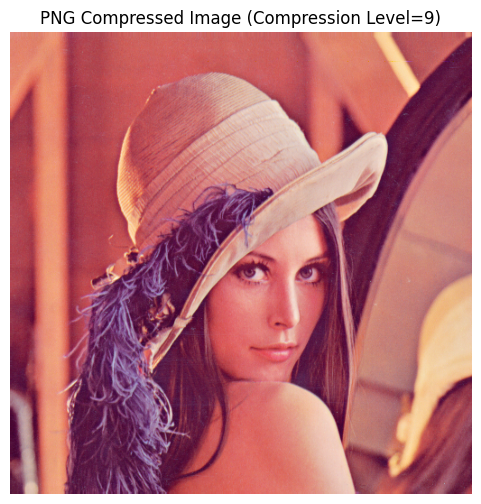

Original Image Size: 462.73 KB
Compressed PNG Image Size: 500.79 KB
Compression Ratio: 108.23%


In [8]:
png_compression = 9

cv2.imwrite('compressed_image.png', image, [int(cv2.IMWRITE_PNG_COMPRESSION), png_compression])

compressed_png = cv2.imread('compressed_image.png')
compressed_png_rgb = cv2.cvtColor(compressed_png, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(compressed_png_rgb)
plt.title(f"PNG Compressed Image (Compression Level={png_compression})")
plt.axis("off")
plt.show()

compressed_png_size = os.path.getsize('compressed_image.png') / 1024

print(f"Original Image Size: {original_size:.2f} KB")
print(f"Compressed PNG Image Size: {compressed_png_size:.2f} KB")
print(f"Compression Ratio: {(compressed_png_size/original_size)*100:.2f}%")


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [11]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8960 - loss: 0.3458 - val_accuracy: 0.9883 - val_loss: 0.0358
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9885 - val_loss: 0.0369
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9912 - val_loss: 0.0294
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9934 - loss: 0.0223 - val_accuracy: 0.9900 - val_loss: 0.0305
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.9902 - val_loss: 0.0291
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9920 - val_loss: 0.0271
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.9917 - val_loss: 0.0305
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0

Test Accuracy: 99.27%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.9929    0.9969    0.9949       980
           1     0.9938    0.9965    0.9952      1135
           2     0.9904    0.9961    0.9932      1032
           3     0.9921    0.9941    0.9931      1010
           4     0.9949    0.9949    0.9949       982
           5     0.9921    0.9910    0.9916       892
           6     0.9979    0.9885    0.9932       958
           7     0.9855    0.9912    0.9884      1028
           8     0.9969    0.9897    0.9933       974
           9     0.9910    0.9871    0.9891      1009

    accuracy                         0.9927     10000
   macro avg     0.9928    0.9926    0.9927     10000
weighted avg     0.9927    0.9927    0.9927     10000



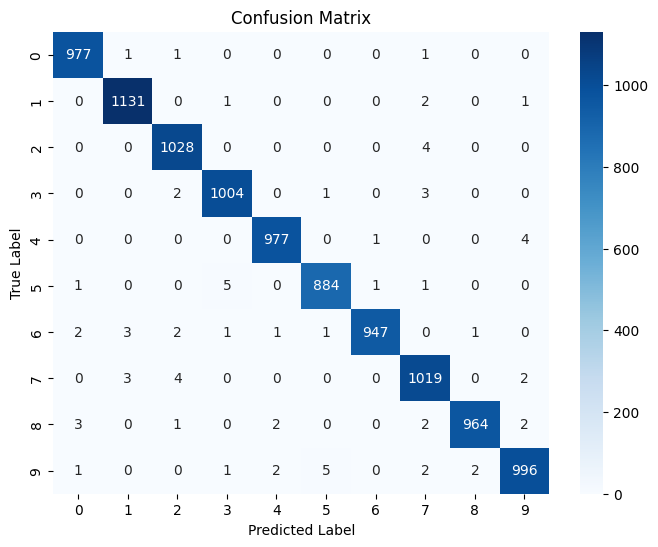

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)


report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [15]:
model_cifar = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_cifar.compile(optimizer="adam",
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

model_cifar.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_cifar = model_cifar.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3813 - loss: 1.6961 - val_accuracy: 0.5861 - val_loss: 1.1592
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6200 - loss: 1.0775 - val_accuracy: 0.6613 - val_loss: 0.9628
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6903 - loss: 0.8805 - val_accuracy: 0.6984 - val_loss: 0.8552
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7392 - loss: 0.7429 - val_accuracy: 0.7160 - val_loss: 0.8086
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7727 - loss: 0.6552 - val_accuracy: 0.7112 - val_loss: 0.8380
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8032 - loss: 0.5679 - val_accuracy: 0.7360 - val_loss: 0.7811
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8220 - loss: 0.5074 - val_accuracy: 0.7458 - val_loss: 0.7824
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8489 - loss: 0.4346 - val_accuracy: 0

In [17]:
test_loss, test_accuracy = model_cifar.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_pred_prob = model_cifar.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)


Test Accuracy: 73.81%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.8098    0.7450    0.7760      1000
           1     0.9361    0.7320    0.8215      1000
           2     0.7535    0.5350    0.6257      1000
           3     0.5495    0.5940    0.5709      1000
           4     0.6130    0.8030    0.6952      1000
           5     0.6873    0.6440    0.6649      1000
           6     0.7442    0.8610    0.7983      1000
           7     0.8614    0.7270    0.7885      1000
           8     0.8461    0.8520    0.8490      1000
           9     0.7093    0.8880    0.7886      1000

    accuracy                         0.7381     10000
   macro avg     0.7510    0.7381    0.7379     10000
weighted avg     0.7510    0.7381    0.7379     10000



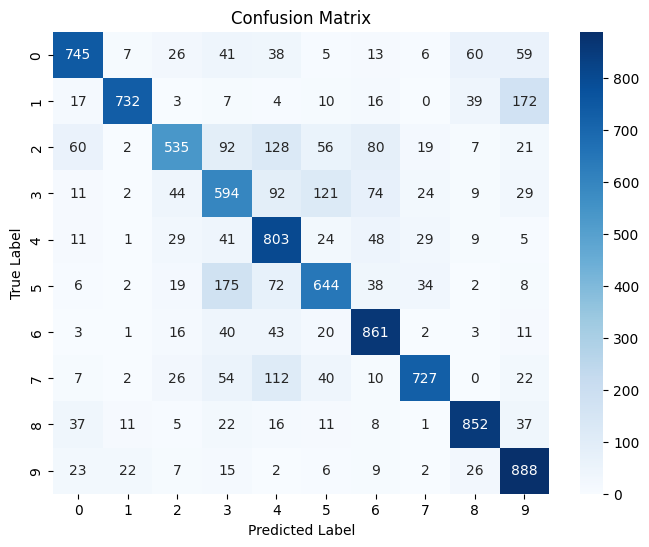

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
